In [1]:
import numpy as np
from mpmath import *
import matplotlib.pyplot as plt

In [2]:
mp.dps = 30


def SLL_normalization(Q, l, m):
    # Normalization constant for the Spherical Landau Level
    # Only depends on the charge Q, Landau level l and angular momentum m
    return sqrt(((2*l+1)/(4*pi)) * binomial(2*l, l-Q)/binomial(2*l, l-m))


def SLL(theta, phi, Q, l, m):
    # Spherical Landau Level
    # Q is the charge, l is the Landau level, m is the angular momentum
    # this function outputs the value (complex number) of the SLL wavefunction at a specified angular coordinate
    u = cos(theta/2)  # * np.exp(1j*phi/2)
    v = sin(theta/2)  # * np.exp(-1j*phi/2)
    pre = SLL_normalization(Q, l, m) * (-1)**(l-m) * \
        v**(Q-m) * u**(Q+m)  # part before the summation
    # part inside the summation
    sum_part = 0
    for s in range(0, int(l-m+1)):
        if (l-Q >= s) and (l+Q >= l-m-s):
            sum_part += (-1)**s * binomial(l-Q, s) * binomial(l+Q, l-m-s) * \
                (v*v)**(l-Q-s) * (u*u)**s
    wf = pre * sum_part  # total wavefunction
    return wf

In [3]:
def overlap_integrand(theta, Q1, Q2, l1, l2, m):
    wf1 = SLL(theta,0,Q1,l1,m)
    wf2 = SLL(theta,0,Q2,l2,m)
    x = 2 * pi * sin(theta) *( wf1 * wf2 )
    return x

def overlap_integral(Q1, Q2, l1, l2, m, theta_cut):
    x = quad(lambda theta: overlap_integrand(
        theta, Q1, Q2, l1, l2, m), [0, theta_cut])
    return x

In [4]:
def magnetic_dirac_wf(theta, Q, n, la, m):
    comp1 = SLL(theta, 0, Q+0.5, Q-0.5+n, m)
    comp2 = la * SLL(theta, 0, Q-0.5, Q-0.5+n, m)
    norm = ((np.sqrt(2))**(np.kron(n,0)))/np.sqrt(2)
    return norm * np.array([comp1, comp2])

In [5]:
def dirac_overlap_integrand(theta, Q1, Q2, n1, n2, la1, la2, m):
    wf1 = magnetic_dirac_wf(theta, Q1, n1, la1, m)
    wf2 = magnetic_dirac_wf(theta, Q2, n2, la2, m)
    x = 2 * pi * sin(theta) * (wf1[0]*wf2[0] + wf1[1]*wf2[1])
    return x

def dirac_overlap_integral(Q1,Q2,n1,n2, la1, la2, m):
    x = quad(lambda theta: dirac_overlap_integrand(theta, Q1, Q2, n1, n2, la1, la2, m), [0, pi])
    return float(np.real(x))

In [6]:
def Bset(Q,cutoff,m):
    # Set of quantum numbers if magentic field and cutoff is specified for a given m
    levels = []
    if ((Q*2) % 2) < 1e-8:
#         M = max(int(abs(m)+0.5),)
        for i in range(-cutoff,cutoff+1):
            l = Q + np.abs(i) - 1/2
            if ((np.abs(m)*2) % 2) > 0.999:
                if np.abs(m) <= np.abs(l):
                    levels.append(i)
    else:
        for i in range(-cutoff,cutoff+1):
            l = Q + np.abs(i) - 1/2
            if ((np.abs(m)*2) % 2) < 1e-8:
                if np.abs(m) <= np.abs(l):
                    levels.append(i)
    return levels

In [7]:
Bset(0,2,0.5)

[-2, -1, 0, 1, 2]

In [8]:
Q1 = 3
cutoff1 = 0
l_max1 = Q1 - 0.5 + cutoff1
mm1 = [-l_max1 + i for i in range(int(2*l_max1+1))]

In [9]:
mm1

[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5]

In [79]:
Q2 = 2
cutoff2 = 10
l_max2 = Q2 - 0.5 + cutoff2
mm2 = [-l_max2 + i for i in range(int(2*l_max2+1))]

In [80]:
Q3 = 1
cutoff3 = 10
l_max3 = Q3 - 0.5 + cutoff3
mm3 = [-l_max3 + i for i in range(int(2*l_max3+1))]

In [81]:
Q4 = 0
cutoff4 = 10
l_max4 = Q4 - 0.5 + cutoff4
mm4 = [-l_max4 + i for i in range(int(2*l_max4+1))]

In [82]:
projection_norm_mwise2 = []
levelsOverall2 = []
Mrecord2 = []
for i,m1 in enumerate(mm1):
    projection_norm_mwise2.append([])
    levelsOverall2.append([])
#     levels1 = Bset(Q1,cutoff1,m1)
    for m2 in mm2:
        if m1 == m2:
            levels2 = Bset(Q2, cutoff2, m2)
            Mrecord2.append(m1)
            for level in levels2:
                la2 = np.sign(level)
                if la2 == 0:
                    la2 = 1
                n2 = np.abs(level)
                la1 = 1
                n1 = 0
                projection_norm_mwise2[i].append(np.abs(dirac_overlap_integral(Q1,Q2,n1,n2,la1,la2,m1)))
                levelsOverall2[i].append(level)

In [83]:
projection_norm_mwise3 = []
levelsOverall3 = []
Mrecord3 = []
for i,m1 in enumerate(mm1):
    projection_norm_mwise3.append([])
    levelsOverall3.append([])
#     levels1 = Bset(Q1,cutoff1,m1)
    for m3 in mm3:
        if m1 == m3:
            levels3 = Bset(Q3, cutoff3, m3)
            Mrecord3.append(m1)
            for level in levels3:
                la2 = np.sign(level)
                if la2 == 0:
                    la2 = 1
                n2 = np.abs(level)
                la1 = 1
                n1 = 0
                projection_norm_mwise3[i].append(np.abs(dirac_overlap_integral(Q1,Q3,n1,n2,la1,la2,m1)))
                levelsOverall3[i].append(level)

In [84]:
projection_norm_mwise4 = []
levelsOverall4 = []
Mrecord4 = []
for i,m1 in enumerate(mm1):
    projection_norm_mwise4.append([])
    levelsOverall4.append([])
#     levels1 = Bset(Q1,cutoff1,m1)
    for m4 in mm4:
        if m1 == m4:
            levels4 = Bset(Q4, cutoff4, m4)
            Mrecord4.append(m1)
            for level in levels4:
                la2 = np.sign(level)
                if la2 == 0:
                    la2 = 1
                n2 = np.abs(level)
                la1 = 1
                n1 = 0
                projection_norm_mwise4[i].append(np.abs(dirac_overlap_integral(Q1,Q4,n1,n2,la1,la2,m1)))
                levelsOverall4[i].append(level)

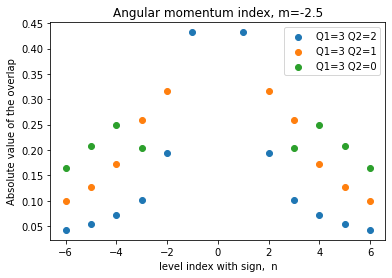

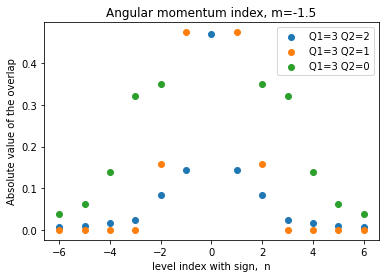

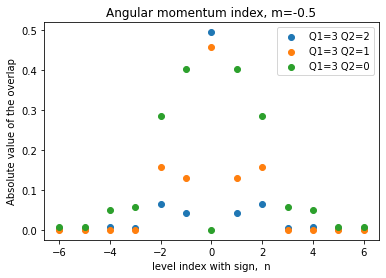

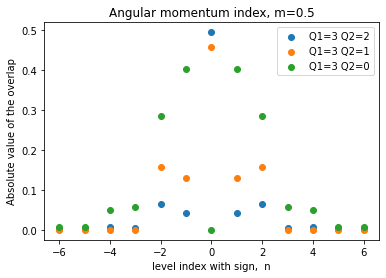

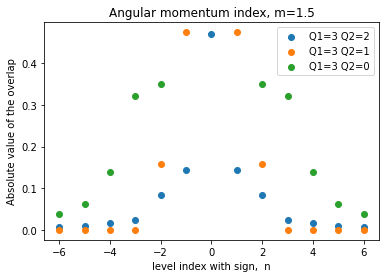

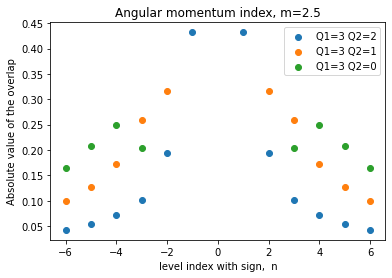

In [71]:
for i in range(len(Mrecord)):
    plt.figure(i)
    plt.title("Angular momentum index, m="+str(Mrecord[i]))
    plt.scatter(levelsOverall2[i],projection_norm_mwise2[i],label="Q1=3 Q2=2")
    plt.scatter(levelsOverall3[i],projection_norm_mwise3[i],label="Q1=3 Q2=1")
    plt.scatter(levelsOverall4[i],projection_norm_mwise4[i],label="Q1=3 Q2=0")
#     plt.plot(levelsOverall2[i],projection_norm_mwise2[i],label="Q1=3 Q2=2")
#     plt.plot(levelsOverall3[i],projection_norm_mwise3[i],label="Q1=3 Q2=1")
#     plt.plot(levelsOverall4[i],projection_norm_mwise4[i],label="Q1=3 Q2=0")
    plt.xlabel("level index with sign,  n")
    plt.ylabel("Absolute value of the overlap")
    plt.legend()
    plt.savefig("Charge3Charge2-1-0overlap_m"+str(Mrecord[i])+".pdf")

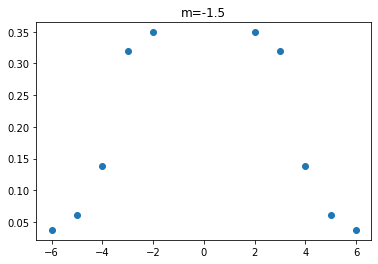

In [42]:
plt.figure(1)
i = 1
plt.title("m="+str(Mrecord[i]))
plt.scatter(levelsOverall[i],projection_norm_mwise[i])

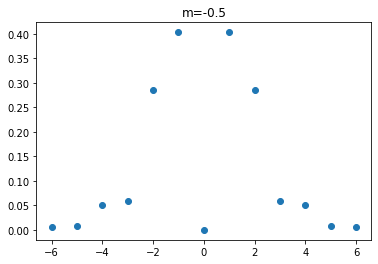

In [43]:
plt.figure(1)
i = 2
plt.title("m="+str(Mrecord[i]))
plt.scatter(levelsOverall[i],projection_norm_mwise[i])

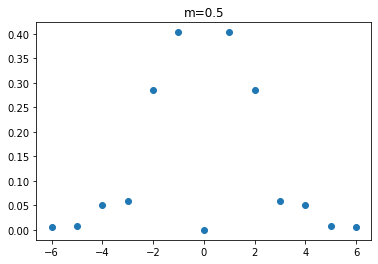

In [44]:
plt.figure(1)
i = 3
plt.title("m="+str(Mrecord[i]))
plt.scatter(levelsOverall[i],projection_norm_mwise[i])

In [119]:
mm1

[-1.5, -0.5, 0.5, 1.5]

In [165]:
def permitted_levels(n_cutoff,m):
    M = int(abs(m)+0.5)
    levels = []

    for i in range(n_cutoff,M-1,-1):
        levels.append(i)
    
    return levels

In [167]:
permitted_levels(4,0.5)

[4, 3, 2, 1]

In [45]:
dirac_overlap_integral(1,1,1,2,1)

-0.14320549046736997

In [23]:
magnetic_dirac_wf(pi/2,0,2,0.5)

array([mpf('-0.141047395886939059233004702429379'),
       mpf('0.141047395886939059233004702429527')], dtype=object)

In [25]:
overlap_integral(2,2,2,2,2,pi)

mpf('1.0')